In [8]:
import sys
with open("inp.txt",'r') as i:
	
	inp = i.readlines()
print(inp)
j=0
for l in inp:
    l = l.partition('#')[0]
    l = l.rstrip()
    inp[j] = l
    j+=1
    print(l)
print(inp) 
print(inp[13])

['730 # gamma linewidth parameter (cm^-1) #770\n', '1 # theta static inhomogeneous linewidth parameter (cm^-1) #50\n', '17750 # E0 (cm^-1)\n', '0.1 # kappa solvent parameter\n', '0.5e-3 # time step (ps)\n', '100 # number of time steps\n', '20000 # range plus and minus E0 to calculate lineshapes\n', '1.7 # transition length M (Angstroms)\n', '1.33 # refractive index n\n', '0 # start raman shift axis (cm^-1)\n', '2500 # end raman shift axis (cm^-1)\n', '2 # rshift axis step size (cm^-1)\n', '20 # raman spectrum resolution (cm^-1)\n', '298 # Temperature (K)\n', '1 # convergence\n', '0']
730
1
17750
0.1
0.5e-3
100
20000
1.7
1.33
0
2500
2
20
298
1
0
['730', '1', '17750', '0.1', '0.5e-3', '100', '20000', '1.7', '1.33', '0', '2500', '2', '20', '298', '1', '0']
298


2. Clone the repository.   
'''git clone https://github.com/Alchemist-Aloha/ResRamQt.git'''

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([-17.0070, -35.9270], requires_grad=True) [tensor([-29.9000, -10.1000]), tensor([-29.7999, -10.2001]), tensor([-29.6996, -10.3005]), tensor([-29.5992, -10.4011]), tensor([-29.4984, -10.5021]), tensor([-29.3973, -10.6035]), tensor([-29.2959, -10.7054]), tensor([-29.1941, -10.8078]), tensor([-29.0918, -10.9109]), tensor([-28.9890, -11.0145]), tensor([-28.8857, -11.1188]), tensor([-28.7819, -11.2239]), tensor([-28.6775, -11.3296]), tensor([-28.5726, -11.4362]), tensor([-28.4670, -11.5435]), tensor([-28.3608, -11.6516]), tensor([-28.2539, -11.7606]), tensor([-28.1464, -11.8704]), tensor([-28.0382, -11.9810]), tensor([-27.9294, -12.0925]), tensor([-27.8199, -12.2049]), tensor([-27.7097, -12.3181]), tensor([-27.5989, -12.4322]), tensor([-27.4874, -12.5472]), tensor([-27.3752, -12.6631]), tensor([-27.2623, -12.7798]), tensor([-27.1488, -12.8974]), tensor([-27.0346, -13.0159]), tensor([-26.9198, -13.1352]), tensor([-26.8043, -13.2554]), tensor([-26.6883, -13.3764]), tensor([-26.5716, -1

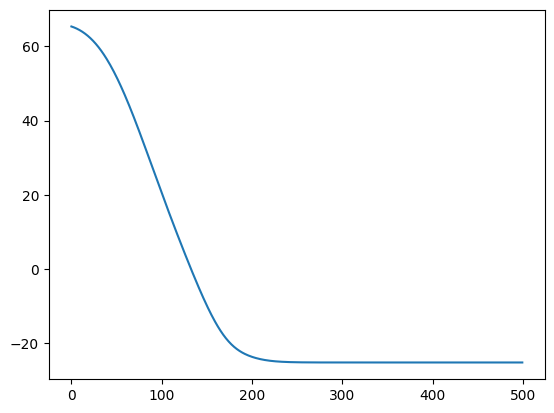

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
def eggholder_function(x):
    return -(x[1] + 47) * torch.sin(torch.sqrt(torch.abs(x[1] + x[0]/2 + 47))) - x[0]*torch.sin(torch.sqrt(torch.abs(x[0]-(x[1]+47))))

def minimize(function, initial_parameters):
    list_params = []
    values = []
    params = initial_parameters
    params.requires_grad_()
    optimizer = torch.optim.Adam([params], lr=0.1)

    for i in range(500):
        optimizer.zero_grad()
        loss = function(params)
        loss.backward()
        optimizer.step()
        values.append(loss.clone().detach())
        list_params.append(params.detach().clone()) #here
        
    return params, list_params,values

starting_point = torch.tensor([-30.,-10.])
minimized_params, list_of_params,results = minimize(eggholder_function, starting_point)
print(minimized_params, list_of_params)
plt.plot(results)

In [2]:
import torch
import numpy as np
torch.cuda.is_available()
def convert_to_pt(inp,output_pt):
    f = torch.from_numpy(np.loadtxt(inp))
    torch.save(f,'rpumps.pt')

x = torch.tensor([1, 2])
y = torch.tensor([4, 5, 6])
grid_x, grid_y = torch.meshgrid(x, y,indexing='xy')
i = np.array([1, 2])
j = np.array([4,5,6])
grid_i, grid_j = np.meshgrid(i, j,sparse=True)
print(grid_x, grid_y)
print(torch.reshape(y,(-1,1)))
print(grid_j[1,0])
print(grid_i, grid_j)
jt=np.reshape(j,(-1,1)).T
print(j.T)
print(grid_x[0,:])
print(grid_y[:,0])

print(torch.complex(torch.tensor(0.0), torch.tensor(-1.0)).to(device = 'cuda:0').get_device())

tensor([[1, 2],
        [1, 2],
        [1, 2]]) tensor([[4, 4],
        [5, 5],
        [6, 6]])
tensor([[4],
        [5],
        [6]])
5
[[1 2]] [[4]
 [5]
 [6]]
[4 5 6]
tensor([1, 2])
tensor([4, 5, 6])
0


In [6]:
import torch
import numpy as np
import torch.nn.functional as F
import torchaudio.functional as AF
inputs = torch.tensor([1, 2,5,7,8])
filters = torch.tensor([4, 5, 6,2,8])
a = np.array([1,2,5,7,8])
n=np.array([4,5,6,2,8])
print(AF.convolve(inputs, filters,mode='valid'))
print(np.convolve(inputs, filters,'valid'))
print(len(a))
print(range(len(a)-1))
#AF.convolve(inputs, filters)

tensor([109])
[109]
5
range(0, 4)


In [129]:
y = torch.tensor([[1, 5, 10],[2,4,6]])
x=np.array([[1,5,10],[2,4,6]])
print(torch.trapz(y,dim = 0))
print(np.trapz(x,axis = 0))

tensor([1.5000, 4.5000, 8.0000])
[10.5  8. ]


In [ ]:
thth, ELEL = torch.meshgrid(th, EL,indexing='xy')
K = torch.zeros((len(wg), len(th)), dtype=torch.cfloat)
print(K.size(),len(wg))
#print(thth)
K[0,:] =   wg[0]*thth[0] 
print(K)  

for l in torch.arange(len(wg)):
        K[l, :] = (1 + eta[l]) * S[l] * (1 - torch.exp(torch.complex(torch.tensor(0.0), torch.tensor(-1.0)) * wg[l] * thth[0])) + eta[l] * S[l] * (
                    1 - torch.exp(torch.complex(torch.tensor(0.0), torch.tensor(1.0)) * wg[l] * thth[0]))
        print('freq '+str(l)+' is calculated')

In [12]:
import numpy as np

test = np.loadtxt("crossSections.dat")
print(test)
print(np.transpose(test))
np.savetxt("rcross_exp.dat",np.transpose(test),delimiter = "\t")

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.6140115e-08 2.8749955e-08 1.3432361e-08 1.5553260e-08
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1327958e-07 1.4818012e-07
  1.4579997e-07 1.9607000e+04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.0190194e-08 0.0000000e+00 0.0000000e+00 2.3330891e-08 1.1216775e-08
  1.8126309e-08 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.6768831e-08 1.0655936e-07 3.1126554e-08 8.7322594e-09 4.3745430e-08
  6.6459389e-09 1.0095097e-08 8.5808347e-09 9.5342592e-08 2.4564734e-08
  1.1250426e-07 1.8692000e+04]
 [1.5920874e-07 1.3853226e-07 1.5240269e-07 2.6879395e-08 1.8091898e-08
  1.0967135e-07 1.3439697e-08 1.2922785e-08 8.6754966e-08 2.4225914e-08
  4.5832810e-08 4.5918966e-09 9.4939425e-09 1.2405877e-08 1.1888963e-08
  

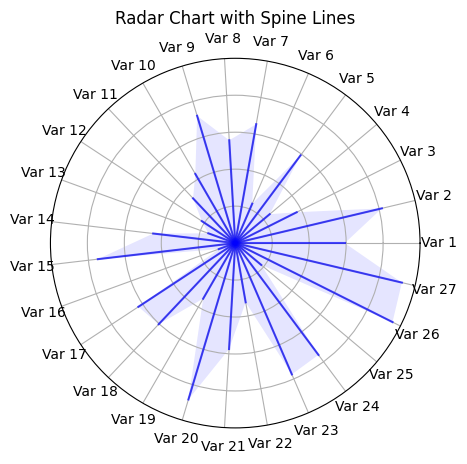

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
def radar_chart(data, variables):
    num_vars = len(variables)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    data = np.concatenate((data, [data[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(subplot_kw={'polar': True})
    ax.fill(angles, data, 'b', alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables)
    ax.set_yticklabels([])

    # Connect data points with spine lines
    for i in range(num_vars):
        ax.plot([0, angles[i]], [0, data[i]], color='b', alpha=0.7)

    ax.set_title('Radar Chart with Spine Lines')

    plt.show()

# Sample data (replace this with your actual data)
num_vars = 27
num_runs = 10
data = np.random.rand(num_runs, num_vars)
variables = [f'Var {i+1}' for i in range(num_vars)]

radar_chart(data[0], variables)


96


KeyboardInterrupt: 

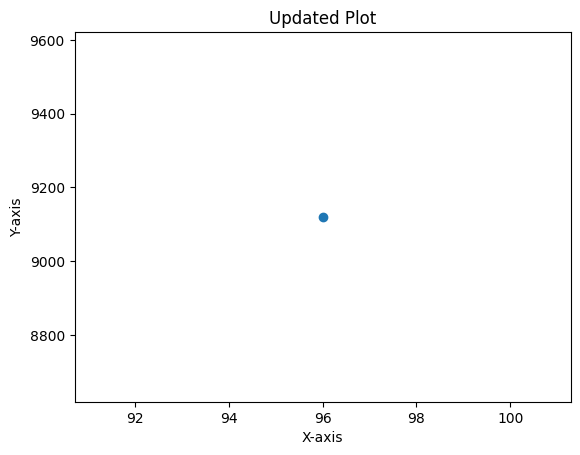

In [16]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np

# Initialize the figure and axis
fig, ax = plt.subplots()

# Create a function to update the plot
def update_plot(x):
    ax.clear()  # Clear the previous plot
    y = x**2-x
    ax.plot(x, y,'o')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Updated Plot')
    display(fig)
    clear_output(wait=True)

# Generate and update the plot interactively

for i in range(1000):
    x = np.linspace(1, i, 1000)
    print(i)
    update_plot(i)

In [11]:

import numpy as np

rshift = np.linspace(0,100,25)
wg = np.array([25,46,79,95])
wg_diff = rshift[np.newaxis,: ] - wg[:, np.newaxis]
wg_diff_squared = wg_diff ** 2
print(wg_diff)

[[-25.         -20.83333333 -16.66666667 -12.5         -8.33333333
   -4.16666667   0.           4.16666667   8.33333333  12.5
   16.66666667  20.83333333  25.          29.16666667  33.33333333
   37.5         41.66666667  45.83333333  50.          54.16666667
   58.33333333  62.5         66.66666667  70.83333333  75.        ]
 [-46.         -41.83333333 -37.66666667 -33.5        -29.33333333
  -25.16666667 -21.         -16.83333333 -12.66666667  -8.5
   -4.33333333  -0.16666667   4.           8.16666667  12.33333333
   16.5         20.66666667  24.83333333  29.          33.16666667
   37.33333333  41.5         45.66666667  49.83333333  54.        ]
 [-79.         -74.83333333 -70.66666667 -66.5        -62.33333333
  -58.16666667 -54.         -49.83333333 -45.66666667 -41.5
  -37.33333333 -33.16666667 -29.         -24.83333333 -20.66666667
  -16.5        -12.33333333  -8.16666667  -4.           0.16666667
    4.33333333   8.5         12.66666667  16.83333333  21.        ]
 [-95.       

In [19]:

import numpy as np

rshift = np.linspace(0,100,25)
wg = np.array([25,46,79,95])
wg_diff = rshift[np.newaxis,: ] - wg[:, np.newaxis]
wg_diff_squared = wg_diff ** 2
rpumps = np.array([35,45,67,78,99])
res = 1
raman_spec = np.zeros((len(rshift),len(rpumps)))
raman_cross = np.zeros((len(wg),100),dtype=complex)
rp = np.array([35,45,67,78,99])
for i in range(len(rpumps)):
    #rp = min(range(len(convEL)),key=lambda j:abs(convEL[j]-rpumps[i]))
    '''
    min_diff = float('inf')
    min_index = None

    for j in range(len(convEL)):
        diff = np.absolute(convEL[j] - rpumps[i])
        if diff < min_diff:
            min_diff = diff
            min_index = j

    rp = min_index
    #print(rp)
    #print(rpumps)
    '''
    '''
    for l in np.arange(len(wg)):
        raman_spec[:,i] += np.real((raman_cross[l,rp[i]]))*(1/np.pi)*(0.5*res)/((rshift-wg[l])**2+(0.5*res)**2)
    '''
    
    wg_diff = rshift[:, np.newaxis] - wg[np.newaxis, :]
    wg_diff_squared = wg_diff ** 2
    res_squared = (0.5 * res) ** 2
    raman_spec[:,i] += np.einsum('ij, j -> i', np.real(raman_cross[:, rp[i]]), (1/np.pi) * (0.5 * res) / (wg_diff_squared[:,i] + res_squared))

ValueError: einstein sum subscripts string contains too many subscripts for operand 0